In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd drive/MyDrive

In [ ]:
!mkdir matrixfast

In [266]:
cd matrixfast

/content/drive/MyDrive/matrixfast


In [ ]:
!unzip ipopt-linux64.zip

In [279]:
!chmod +x ipopt

In [280]:
ls

coin-license.txt  ipopt*  ipopt-linux64.zip


# installing packages

In [5]:
!pip install -q pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.2 MB/s eta 0:00:00


In [6]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 122541 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.7.1+dfsg-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.7.1+dfsg-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.7.1+dfsg-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.7.1+dfsg-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.7.1+dfsg-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.7.1+dfsg-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-2_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-2) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-2_amd64.deb ...
Unpacking glpk-utils (4.65-2) ...
Setting up libsuitesparseconfig5:amd64 (1:5.7.1+dfsg-2) ...
Setting up libamd2:amd64 (1:5.7.1+

In [267]:
import random

In [268]:
import pyomo.environ as pyo

# Creating model:

In [281]:
model=pyo.ConcreteModel()

In [282]:
model.rowset = pyo.Set(initialize=[1, 2, 3, 4])
model.columnset = pyo.Set(initialize=[1, 2, 3, 4, 5, 6, 7])
model.iset=model.rowset*model.columnset

## variables:

In [283]:
model.u=pyo.Var(model.iset, domain=pyo.Reals,bounds=(-1,1))

In [284]:
model.v=pyo.Var(model.iset, domain=pyo.Reals,bounds=(-1,1))

In [285]:
model.w=pyo.Var(model.iset, domain=pyo.Reals,bounds=(-1,1))

## initializing variables:

In [286]:
# random initialize all variables
for i in range(1,5):
  for j in range(1,8):
    model.u[i,j]=float(random.randint(-1,1))
    model.v[i,j]=float(random.randint(-1,1))
    model.w[i,j]=float(random.randint(-1,1))

# Objective function:

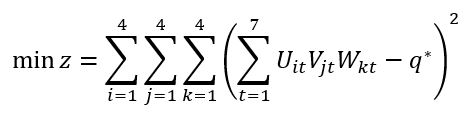

In [287]:
def obj_rule(model):
  ans=0
  for i in range(1,5):
    for j in range(1,5):
      for k in range(1,5):
        tmp=0
        for curr in range(1,8):
          tmp+=model.u[i,curr]*model.v[j,curr]*model.w[k,curr]
        if (i==1 and j==1 and k==1) or (i==2 and j==3 and k==1) or (i==1 and j==2 and k==2) or (i==2 and j==4 and k==2) or \
              (i==3 and j==1 and k==3) or (i==4 and j==3 and k==3) or (i==3 and j==2 and k==4) or (i==4 and j==4 and k==4) :
          ans+=(tmp-1.0)**2
        else:
          ans+=tmp**2

  return ans

In [288]:
model.obj = pyo.Objective(rule=obj_rule, sense=pyo.minimize)

# Displaying model before optimization

In [289]:
model.display()

Model unknown

  Variables:
    u : Size=28, Index=iset
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :    -1 :   1.0 :     1 : False : False :  Reals
        (1, 2) :    -1 :   0.0 :     1 : False : False :  Reals
        (1, 3) :    -1 :  -1.0 :     1 : False : False :  Reals
        (1, 4) :    -1 :   1.0 :     1 : False : False :  Reals
        (1, 5) :    -1 :  -1.0 :     1 : False : False :  Reals
        (1, 6) :    -1 :  -1.0 :     1 : False : False :  Reals
        (1, 7) :    -1 :   0.0 :     1 : False : False :  Reals
        (2, 1) :    -1 :   1.0 :     1 : False : False :  Reals
        (2, 2) :    -1 :  -1.0 :     1 : False : False :  Reals
        (2, 3) :    -1 :  -1.0 :     1 : False : False :  Reals
        (2, 4) :    -1 :   0.0 :     1 : False : False :  Reals
        (2, 5) :    -1 :   1.0 :     1 : False : False :  Reals
        (2, 6) :    -1 :   0.0 :     1 : False : False :  Reals
        (2, 7) :    -1 :  -1.0 :     1 : False :

# Solving the model with nonlinear solver **ipopt**

(if you encountered any error try the command 'chmod +x ipopt')

In [290]:
result=pyo.SolverFactory('ipopt', executable='./ipopt').solve(model)

In [291]:
model.display()

Model unknown

  Variables:
    u : Size=28, Index=iset
        Key    : Lower : Value                 : Upper : Fixed : Stale : Domain
        (1, 1) :    -1 :    0.9300903639019524 :     1 : False : False :  Reals
        (1, 2) :    -1 :   0.24545679904704104 :     1 : False : False :  Reals
        (1, 3) :    -1 :   -0.6639466827005419 :     1 : False : False :  Reals
        (1, 4) :    -1 :  0.020951542070064267 :     1 : False : False :  Reals
        (1, 5) :    -1 :  0.024822801085956366 :     1 : False : False :  Reals
        (1, 6) :    -1 :   0.30333832988110515 :     1 : False : False :  Reals
        (1, 7) :    -1 :    0.2742465066118971 :     1 : False : False :  Reals
        (2, 1) :    -1 :  -0.36557546623598247 :     1 : False : False :  Reals
        (2, 2) :    -1 :   -0.8413605335315177 :     1 : False : False :  Reals
        (2, 3) :    -1 :   -0.7952742209626308 :     1 : False : False :  Reals
        (2, 4) :    -1 :   0.02509573954535949 :     1 : False :

# Displaying discovered algorithm (discovered U,V,W matrices):

In [298]:
U_matrix=np.ones((4,7))
V_matrix=np.ones((4,7))
W_matrix=np.ones((4,7))
for i in range(1,5):
  for j in range(1,8):
    U_matrix[i-1][j-1]=pyo.value(model.u[i,j])
    V_matrix[i-1][j-1]=pyo.value(model.u[i,j])
    W_matrix[i-1][j-1]=pyo.value(model.u[i,j])
print("U: \n",U_matrix)
print("V: \n",V_matrix)
print("W: \n",W_matrix)

U: 
 [[ 0.93009036  0.2454568  -0.66394668  0.02095154  0.0248228   0.30333833
   0.27424651]
 [-0.36557547 -0.84136053 -0.79527422  0.02509574 -0.00975669 -0.94232495
  -0.94004399]
 [-0.61304688  0.19981481 -0.54048764 -0.77190829 -0.91453534 -0.96215161
  -0.18076304]
 [ 0.24096037 -0.68491191 -0.64739522 -0.92459049  0.35946153 -0.2918669
   0.61960761]]
V: 
 [[ 0.93009036  0.2454568  -0.66394668  0.02095154  0.0248228   0.30333833
   0.27424651]
 [-0.36557547 -0.84136053 -0.79527422  0.02509574 -0.00975669 -0.94232495
  -0.94004399]
 [-0.61304688  0.19981481 -0.54048764 -0.77190829 -0.91453534 -0.96215161
  -0.18076304]
 [ 0.24096037 -0.68491191 -0.64739522 -0.92459049  0.35946153 -0.2918669
   0.61960761]]
W: 
 [[ 0.93009036  0.2454568  -0.66394668  0.02095154  0.0248228   0.30333833
   0.27424651]
 [-0.36557547 -0.84136053 -0.79527422  0.02509574 -0.00975669 -0.94232495
  -0.94004399]
 [-0.61304688  0.19981481 -0.54048764 -0.77190829 -0.91453534 -0.96215161
  -0.18076304]
 [ 0.2

# All at once function:

In [303]:
def find_solution():
  model=pyo.ConcreteModel()
  model.rowset = pyo.Set(initialize=[1, 2, 3, 4])
  model.columnset = pyo.Set(initialize=[1, 2, 3, 4, 5, 6, 7])
  model.iset=model.rowset*model.columnset
  model.u=pyo.Var(model.iset, domain=pyo.Reals,bounds=(-1,1))
  model.v=pyo.Var(model.iset, domain=pyo.Reals,bounds=(-1,1))
  model.w=pyo.Var(model.iset, domain=pyo.Reals,bounds=(-1,1))
  # random initialize all variables
  for i in range(1,5):
    for j in range(1,8):
      model.u[i,j]=float(random.randint(-1,1))
      model.v[i,j]=float(random.randint(-1,1))
      model.w[i,j]=float(random.randint(-1,1))
  def obj_rule(model):
    ans=0
    for i in range(1,5):
      for j in range(1,5):
        for k in range(1,5):
          tmp=0
          for curr in range(1,8):
            tmp+=model.u[i,curr]*model.v[j,curr]*model.w[k,curr]
          if (i==1 and j==1 and k==1) or (i==2 and j==3 and k==1) or (i==1 and j==2 and k==2) or (i==2 and j==4 and k==2) or \
                (i==3 and j==1 and k==3) or (i==4 and j==3 and k==3) or (i==3 and j==2 and k==4) or (i==4 and j==4 and k==4) :
            ans+=(tmp-1.0)**2
          else:
            ans+=tmp**2
    return ans
  model.obj = pyo.Objective(rule=obj_rule, sense=pyo.minimize)
  result=pyo.SolverFactory('ipopt', executable='./ipopt').solve(model)
  return model

In [304]:
model=find_solution()

In [305]:
model.display()

Model unknown

  Variables:
    u : Size=28, Index=iset
        Key    : Lower : Value                : Upper : Fixed : Stale : Domain
        (1, 1) :    -1 :  0.14686171509312065 :     1 : False : False :  Reals
        (1, 2) :    -1 :    0.765878807230924 :     1 : False : False :  Reals
        (1, 3) :    -1 : -0.03942847082381045 :     1 : False : False :  Reals
        (1, 4) :    -1 :  -0.8952783851020599 :     1 : False : False :  Reals
        (1, 5) :    -1 : -0.25244510059128755 :     1 : False : False :  Reals
        (1, 6) :    -1 :   0.8021587938221949 :     1 : False : False :  Reals
        (1, 7) :    -1 :   0.9469405530999322 :     1 : False : False :  Reals
        (2, 1) :    -1 : -0.10757646497355672 :     1 : False : False :  Reals
        (2, 2) :    -1 :  -0.5610076410491427 :     1 : False : False :  Reals
        (2, 3) :    -1 : -0.14793637904514428 :     1 : False : False :  Reals
        (2, 4) :    -1 :  -0.5114445341450519 :     1 : False : False :  Re

# Using our discovered Algorithm:

suppose we have two matrix 2x2 such as A and B

In [306]:
import numpy as np

In [307]:
A=np.array([[1,2],
            [3,4]],dtype=np.float32)
B=np.array([[5,6],
            [7,8]],dtype=np.float32)

In [309]:
c1=0
c2=0
c3=0
c4=0
m_array=[]
for i in range(1,8):
  first_paranthese=0
  second_paranthese=0
  for j in range(1,5):
    first_paranthese+=pyo.value(model.u[j,i])*A[(j-1)//2][(j-1)%2]
    second_paranthese+=pyo.value(model.v[j,i])*B[(j-1)//2][(j-1)%2]
  m_array.append(first_paranthese*second_paranthese)
for i in range(1,8):
  c1+=m_array[i-1]*pyo.value(model.w[1,i])
  c2+=m_array[i-1]*pyo.value(model.w[2,i])
  c3+=m_array[i-1]*pyo.value(model.w[3,i])
  c4+=m_array[i-1]*pyo.value(model.w[4,i])

## Ground truth answer:

In [313]:
A @ B

array([[19., 22.],
       [43., 50.]], dtype=float32)

## Answer using our discovered algorithm:

In [315]:
c1,c2,c3,c4

(18.99999943044926, 22.00000026367782, 43.00000009654833, 49.99999964915442)

In [316]:
round(c1),round(c2),round(c3),round(c4)

(19, 22, 43, 50)